# Finger 1

- Analizar la distribución de postulaciones a avisos según:
    - la fecha
    - dia del mes
    - dia de la semana
    - etc. 
- Algunas de las preguntas que podrían plantearse son: 
    - Se recibe un volumen de postulaciones similar cualquier dia de la semana? 
    - Existen variaciones según el mes del año, o aun dentro del mes? 
    - Etc. 
- Averiguar:
    - cuál es área de trabajo (nombre_area) sobre la cual se concentra mayor cantidad de ofertas laborales
    - y dentro de esta área, cuál es la zona (nombre_zona) en donde hay mas demanda?  


In [1]:
%matplotlib inline

from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # haciendo los graficos un poco mas bonitos xD
plt.rcParams['figure.figsize'] = (15, 5)

## Analisis de postulantes

In [2]:
DATA_PATH = 'datos_navent_fiuba/'
postulantes_educacion = pd.read_csv('./datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
postulantes_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [3]:
postulantes_genero_y_edad = pd.read_csv('./datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
postulantes_genero_y_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [4]:
postulantes = pd.merge(postulantes_educacion, postulantes_genero_y_edad, on='idpostulante')
postulantes.head()

,idpostulante,nombre,estado,fechanacimiento,sexo
0,NdJl,Posgrado,En Curso,1969-05-09,MASC
1,NdJl,Universitario,Graduado,1969-05-09,MASC
2,8BkL,Universitario,En Curso,1976-07-21,FEM
3,8BkL,Universitario,Graduado,1976-07-21,FEM
4,8BkL,Posgrado,Graduado,1976-07-21,FEM


## Analisis de postulaciones

In [19]:
postulaciones = pd.read_csv('./datos_navent_fiuba/fiuba_4_postulaciones.csv')
postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'])
postulaciones['aniopostulacion'] = postulaciones['fechapostulacion'].dt.year
postulaciones['mespostulacion'] = postulaciones['fechapostulacion'].dt.month
postulaciones['diasemanapostulacion'] = postulaciones['fechapostulacion'].dt.weekday_name
postulaciones['diapostulacion'] = postulaciones['fechapostulacion'].dt.date
postulaciones.head()

,idaviso,idpostulante,fechapostulacion,aniopostulacion,mespostulacion,diasemanapostulacion,diapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34,2018,1,Monday,2018-01-15
1,1111920714,NM5M,2018-02-06 09:04:50,2018,2,Tuesday,2018-02-06
2,1112346945,NM5M,2018-02-22 09:04:47,2018,2,Thursday,2018-02-22
3,1112345547,NM5M,2018-02-22 09:04:59,2018,2,Thursday,2018-02-22
4,1112237522,5awk,2018-01-25 18:55:03,2018,1,Thursday,2018-01-25


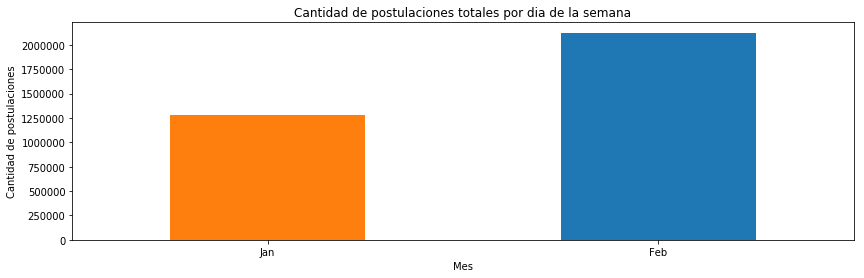

In [67]:
postulaciones['monthname'] = postulaciones['fechapostulacion'].dt.strftime('%b')
postulaciones.groupby('monthname').count()['idpostulante'].plot(kind='bar', figsize=(14,4),  rot=0);
ax=plt.gca();
ax.invert_xaxis();
ax.set_ylabel('Cantidad de postulaciones');
ax.set_xlabel('Mes');
ax.set_title('Cantidad de postulaciones totales por dia de la semana');

## Postulaciones por dia para el mes de enero

In [6]:
postulaciones_mes1 = postulaciones.loc[postulaciones['mespostulacion'] == 1, :]
postulaciones_mes1 = postulaciones_mes1.groupby('diapostulacion').count()
postulaciones_mes1.insert(0, 'diadelmes', range(1, 1 + len(postulaciones_mes1)))
postulaciones_mes1 = postulaciones_mes1.set_index('diadelmes')
#postulaciones_mes1 = postulaciones_mes1.reset_index()

print ("Cantidad de postulantes en mes de enero:", postulaciones_mes1['idpostulante'].sum())

Cantidad de postulantes en mes de enero: 1276198


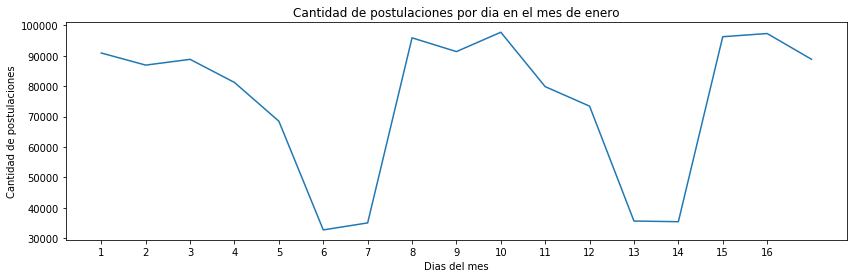

In [7]:
postulaciones_mes1['idpostulante'].plot(figsize=(14,4));
ax=plt.gca()
ax.set_ylabel('Cantidad de postulaciones')
ax.set_xlabel('Dias del mes');
ax.set_title('Cantidad de postulaciones por dia en el mes de enero')
plt.xticks(np.arange(1, len(postulaciones_mes1), 1.0));

## Postulaciones por dia para el mes de febrero

In [8]:
postulaciones_mes2 = postulaciones.loc[postulaciones['mespostulacion'] == 2, :]
postulaciones_mes2 = postulaciones_mes2.groupby('diapostulacion').count()
postulaciones_mes2.insert(0, 'diadelmes', range(1, 1 + len(postulaciones_mes2)))
postulaciones_mes2 = postulaciones_mes2.set_index('diadelmes')
#postulaciones_mes2 = postulaciones_mes2.reset_index()
print ("Cantidad de postulantes en mes de enero:", postulaciones_mes1['idpostulante'].sum())


Cantidad de postulantes en mes de enero: 1276198


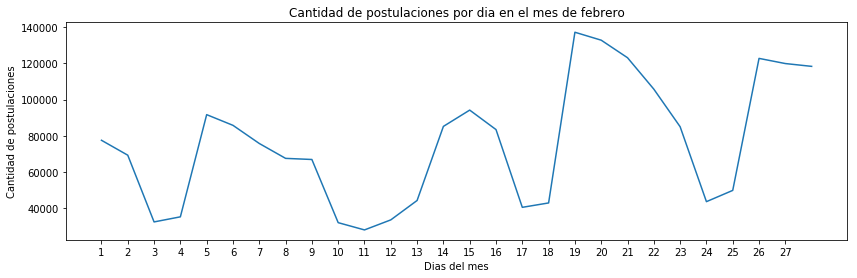

In [9]:
postulaciones_mes2['idpostulante'].plot(figsize=(14,4));
ax=plt.gca()
ax.set_ylabel('Cantidad de postulaciones')
ax.set_xlabel('Dias del mes');
ax.set_title('Cantidad de postulaciones por dia en el mes de febrero')
plt.xticks(np.arange(1, len(postulaciones_mes2), 1.0));

## Postulaciones promedio por dia del mes

In [10]:
postulaciones_mes1 = postulaciones_mes1[['idpostulante']]
postulaciones_mes1 = postulaciones_mes1.rename(columns={'idpostulante': 'count'})
postulaciones_mes1['mes'] = 1

postulaciones_mes2 = postulaciones_mes2[['idpostulante']]
postulaciones_mes2 = postulaciones_mes2.rename(columns={'idpostulante': 'count'})
postulaciones_mes2['mes'] = 2

postulacionespormes = pd.concat([postulaciones_mes1, postulaciones_mes2]).groupby('diadelmes')
postulacionespormes = postulacionespormes.agg({'count': 'mean'})
print("Postulaciones promedio mensual:", postulacionespormes['count'].sum())

Postulaciones promedio mensual: 2241374.0


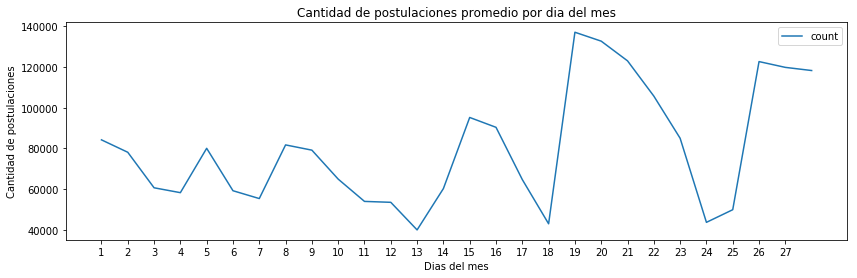

In [11]:
postulacionespormes.plot(figsize=(14,4));
ax=plt.gca()
ax.set_ylabel('Cantidad de postulaciones')
ax.set_xlabel('Dias del mes');
ax.set_title('Cantidad de postulaciones promedio por dia del mes')
plt.xticks(np.arange(1, len(postulacionespormes), 1.0));

## Postulaciones por fecha

In [12]:
postulaciones.groupby('diasemanapostulacion')['idpostulante'].count()

diasemanapostulacion
Friday       446698
Monday       668310
Saturday     217331
Sunday       226857
Thursday     506163
Tuesday      658428
Wednesday    677836
Name: idpostulante, dtype: int64

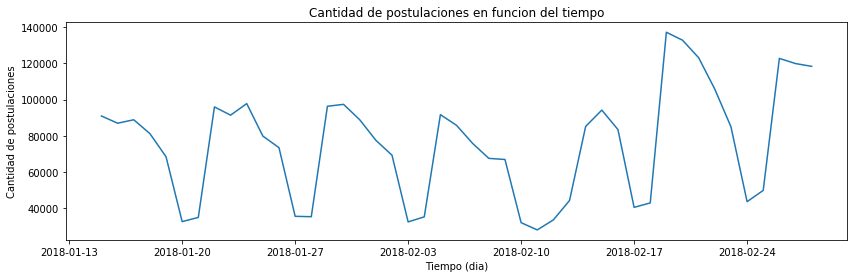

In [18]:
postulaciones.groupby('diapostulacion').count()['idpostulante'].plot(figsize=(14,4));
ax=plt.gca()
ax.set_ylabel('Cantidad de postulaciones')
ax.set_xlabel('Tiempo (dia)');
ax.set_title('Cantidad de postulaciones en funcion del tiempo');

## Postulaciones promedio por dia de la semana

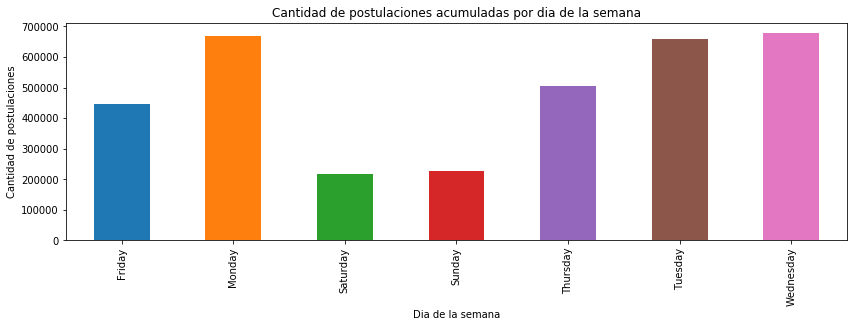

In [73]:
postulaciones_totales_por_dia = postulaciones.groupby('diasemanapostulacion').count()['idpostulante']
postulaciones_totales_por_dia.plot(kind='bar', figsize=(14,4));
ax=plt.gca();
ax.set_ylabel('Cantidad de postulaciones');
ax.set_xlabel('Dia de la semana');
ax.set_title('Cantidad de postulaciones acumuladas por dia de la semana');

## Analisis de ofertas laborales

In [30]:
avisos_online = pd.read_csv('./datos_navent_fiuba/fiuba_5_avisos_online.csv')
avisos_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [32]:
avisos_online_detalle = pd.read_csv('./datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
avisos_online_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [53]:
cant_avisos_por_area = avisos_online_detalle.groupby('nombre_area').count()['idaviso'].sort_values(ascending=False)
cant_avisos_por_area.head()

nombre_area
Ventas            1659
Comercial          983
Administración     901
Producción         821
Programación       576
Name: idaviso, dtype: int64

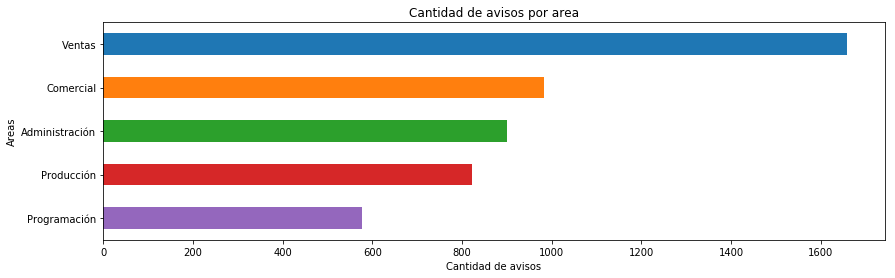

In [51]:
cant_avisos_por_area.head().plot(kind='barh', figsize=(14,4));
ax=plt.gca();
ax.invert_yaxis();
ax.set_ylabel('Areas');
ax.set_xlabel('Cantidad de avisos');
ax.set_title('Cantidad de avisos por area');

In [56]:
avisos_ventas = avisos_online_detalle[avisos_online_detalle['nombre_area'] == 'Ventas']
avisos_ventas.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
5,1001135716,1,Vendedor Viajante TUCUMAN/SANTIAGO DEL ESTERO,<p>Somos una empresa multinacional que opera e...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Wurth Argentina S.A
6,1001326344,1,Vendedor Viajante RECONQUISTA/AVELLANEDA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Wurth Argentina S.A
7,1001455648,1,Vendedor Viajante PILAR / ESCOBAR/TIGRE,<p>Somos una empresa multinacional que opera e...,Gran Buenos Aires,NaN,NaN,Full-time,Junior,Ventas,Wurth Argentina S.A
11,1002181678,1,Vendedor Viajante TIERRA DEL FUEGO,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Wurth Argentina S.A
12,1002308544,1,Preventistas Importante Distribuidora de Bebidas,<p>YAMANIL S-A . se encuentra en busqueda de p...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,YAMANIL SA


In [69]:
avisos_ventas_por_zone = avisos_ventas.groupby('nombre_zona').count()['idaviso'].sort_values(ascending=False)
avisos_ventas_por_zone

nombre_zona
Gran Buenos Aires              1521
Capital Federal                 137
Buenos Aires (fuera de GBA)       1
Name: idaviso, dtype: int64

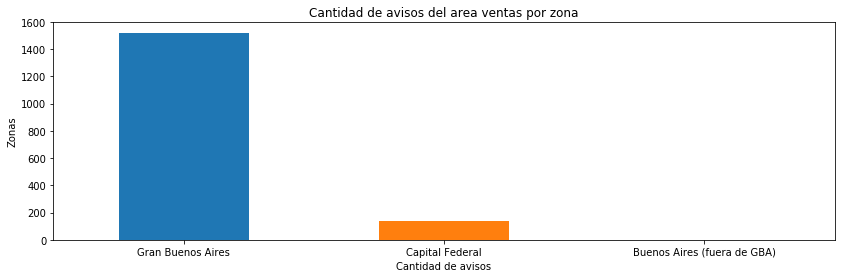

In [66]:
avisos_ventas_por_zone.head().plot(kind='bar', figsize=(14,4),  rot=0);
ax=plt.gca();
ax.set_ylabel('Zonas');
ax.set_xlabel('Cantidad de avisos');
ax.set_title('Cantidad de avisos del area ventas por zona');